# Introduction to Scikit-Learn (Sklearn)

This notebook demonstrates osme of the most usefull fucntions of the beautiful Scikit-Learn library.
What we are goint to cover:

0. An end to end sklearn workflow
1. getting the data ready
2. choose the right estimator/algorithm for our problems
3. fit the model/algorithm and use it to make predictions on our data
4. evaluating a model
5. improve a model
6. save and load a trained model
7. putting it all together

<img src="Precision,Recall,F1-score,Support.png"/>

<img src="Accuracy.png"/>

<img src="Precision,Recall,F1-score,Support,Accuracy Meaing.png"/>

## 0. An End to End Scikit-Learn workflow

In [1]:
# 1. Get the data ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# Create X (features matrix)
X=heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

In [3]:
# Choose the right model and hyperparameters
import sklearn
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# we will keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
X.shape, y.shape

((303, 13), (303,))

<img src="cross_validation_grid_search_workflow.png" width="400"/>

In [5]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

# split the data into train and test sets
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape, type(X_train),type(X_test),type(y_train),type(y_test)

((242, 13),
 (61, 13),
 (242,),
 (61,),
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [6]:
## fit the data to mode for train

clf.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
# Make a prediction
y_prads = clf.predict(X_test)
y_prads

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [8]:
y_test

274    0
299    0
130    1
302    0
159    1
      ..
15     1
287    0
141    1
200    0
97     1
Name: target, Length: 61, dtype: int64

In [9]:
# 4. Evaluate the model (Final ealuation) on training data and test data (Score -> mean error)
# accuracy %
clf.score(X_train,y_train),clf.score(X_test,y_test)

(1.0, 0.7540983606557377)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_true=y_test,y_pred=y_prads))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74        28
           1       0.78      0.76      0.77        33

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [11]:
confusion_matrix(y_true=y_test,y_pred=y_prads)

array([[21,  7],
       [ 8, 25]])

In [12]:
accuracy_score(y_test,y_prads)

0.7540983606557377

<img src="n_estimators.png" />

In [13]:
# 5. Improve a model
# Try different amount of n_estimators

np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f'Model accuracy on test set: {clf.score(X_test,y_test)*100:.2f} %')
    print(" ")

Trying model with 10 estimators...
Model accuracy on test set: 80.33 %
 
Trying model with 20 estimators...
Model accuracy on test set: 80.33 %
 
Trying model with 30 estimators...
Model accuracy on test set: 80.33 %
 
Trying model with 40 estimators...
Model accuracy on test set: 80.33 %
 
Trying model with 50 estimators...
Model accuracy on test set: 80.33 %
 
Trying model with 60 estimators...
Model accuracy on test set: 80.33 %
 
Trying model with 70 estimators...
Model accuracy on test set: 77.05 %
 
Trying model with 80 estimators...
Model accuracy on test set: 77.05 %
 
Trying model with 90 estimators...
Model accuracy on test set: 75.41 %
 


In [14]:
# 6. Save a moddel and load it

import pickle

pickle.dump(clf,open("random_forest_model_1.pkl","wb"))

In [15]:
with open("random_forest_model_1.pkl","rb") as file:
    loaded_model = pickle.load(file)

In [16]:
loaded_model.score(X_test,y_test)

0.7540983606557377

## 1. Getting our data ready to be used with machine learning 

Three main things we have to do:

    1. Split the data into features and labels (usually `X` & `Y`)
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called  feature encoding)


In [17]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
X = heart_disease.drop("target", axis =1)
y = heart_disease["target"]

X.shape, y.shape

((303, 13), (303,))

In [19]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [20]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier().fit(X_train,y_train)
clf

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
clf.score(X_test,y_test)

0.8852459016393442

# Clean up----> Transform -----> Numerical
### 1.1 Make sure it's All numerical (Car-Sales....................................................)

In [23]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [24]:
len(car_sales)

1000

In [25]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [26]:
# Split into X/y

X = car_sales.drop("Price",axis=1)
y = car_sales["Price"]
X.shape, y.shape

((1000, 4), (1000,))

In [27]:
#split into raining and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 4), (200, 4), (800,), (200,))

In [28]:
# Restart the model
# Turn the catagories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
catagorial_feature = ["Make","Colour","Doors"]
One_hot = OneHotEncoder()
transformer= ColumnTransformer([("One_hot",One_hot,catagorial_feature)],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]], shape=(1000, 13))

In [29]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [30]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [31]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]],dtype=int)
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [32]:
# Let's refit the model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)

model.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [34]:
y.head()

0    15323
1    19943
2    28343
3    13434
4    14043
Name: Price, dtype: int64

In [35]:
model.score(X_test,y_test)

0.3235867221569877

# What happen If Missing values in data

1. Fill them with some value (also know as imputation)
2. Remove the samples with missing data altogether

In [36]:
car_sales= pd.read_csv("car-sales-extended-missing-data.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [37]:
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

# Option 1: Fill missing data with Pandas

In [38]:
# Fill the "Make" column
car_sales["Make"]=car_sales["Make"].fillna("missing")
car_sales["Colour"]=car_sales["Colour"].fillna("missing")
car_sales["Odometer (KM)"]=car_sales["Odometer (KM)"].fillna(car_sales["Odometer (KM)"].mean())
car_sales["Doors"]=car_sales["Doors"].fillna(4)

car_sales.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [39]:
car_sales.dropna(inplace=True)

In [40]:
car_sales.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [41]:
car_sales.shape

(950, 5)

In [42]:
X = car_sales.drop("Price", axis=1)
y =car_sales["Price"]

In [43]:
# Lets try and convert our data to numbers

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
model = RandomForestRegressor()
catagorial_feature = ["Make", "Colour", "Doors"]
transformer = ColumnTransformer([("One_hot", OneHotEncoder(),catagorial_feature)],remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales)
transformed_X


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]], shape=(950, 16))

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(transformed_X,y,test_size=0.2)
X_train.shape,X_test.shape, y_train.shape, y_test.shape 

((760, 16), (190, 16), (760,), (190,))

In [45]:
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [46]:
model.score(X_test,y_test)

0.9999491016126744

# Option 2: Fill missing values with Scikit-Learn

In [47]:
car_sales= pd.read_csv("car-sales-extended-missing-data.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [48]:
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [49]:
car_sales.dropna(subset="Price",inplace=True)

In [50]:
car_sales.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [51]:
# split in X & y
X = car_sales.drop("Price",axis =1)
y = car_sales["Price"]
X.shape, y.shape

((950, 4), (950,))

In [52]:
# Take care of the missing data with Scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill catagorical value with "missing" and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define column
cat_feature=["Make","Colour"]
door_feature=["Doors"]
num_feature=["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer= ColumnTransformer([
    ("cat_feature",cat_imputer,cat_feature),
    ("door_feature",door_imputer,door_feature),
    ("num_feature",num_imputer,num_feature)
    
])
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], shape=(950, 4), dtype=object)

In [53]:
car_sales_filled = pd.DataFrame(filled_X,columns=["Make","Colour","Doors","Price"])
car_sales_filled.isna().sum()

Make      0
Colour    0
Doors     0
Price     0
dtype: int64

In [54]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
model = RandomForestRegressor()
catagorial_feature = ["Make", "Colour", "Doors"]
transformer = ColumnTransformer([("One_hot", OneHotEncoder(),catagorial_feature)],remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

In [55]:
# Now we hae got our data as numbers and filled (no missing value)
# let's fit a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.21990196728583944

### Step by step explanation:

In [56]:
What_were_covering = [
    '0. An end to end Scikit-Learn workflow',
    '1. Getting the data ready',
    '2. Choose the right estimator/algorithm for our problems',
    '3. Fit the model/algorithm and use it to make predictions on our data',
    '4. Evaluating a model',
    '5. Improve a model',
    '6. Save and load a trained model',
    '7. putting it all together'
]

## 2. Choosing the right estimator/algorithm for our problem

Scikit-Learn uses estimator as another term for machine learing model or algorithm

* Classification - predicting whether a sample is a one thing or another
* Regression - predicting  a number

### 2.2 Picking a machine learning model for a regression problem

In [57]:
boston_df = pd.read_csv("boston.csv")
boston_df

,TOWN,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,target
0,Nahant,2011,-70.9550,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3
1,Swampscott,2021,-70.9500,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8
2,Swampscott,2022,-70.9360,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8
3,Marblehead,2031,-70.9280,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7
4,Marblehead,2032,-70.9220,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Winthrop,1801,-70.9860,42.2312,22.4,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0
502,Winthrop,1802,-70.9910,42.2275,20.6,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0
503,Winthrop,1803,-70.9948,42.2260,23.9,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0
504,Winthrop,1804,-70.9875,42.2240,22.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0


In [58]:
from sklearn.linear_model import Ridge
np.random.seed(42)
X=boston_df.drop("target",axis=1)
y=boston_df["target"]

In [59]:
X.shape,y.shape

((506, 15), (506,))

In [60]:
boston_df.dtypes

TOWN       object
TRACT       int64
LON       float64
LAT       float64
MEDV      float64
CRIM      float64
ZN        float64
INDUS     float64
CHAS        int64
NOX       float64
RM        float64
AGE       float64
DIS       float64
RAD         int64
TAX         int64
target    float64
dtype: object

In [61]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
catagorial_feature = ["TOWN"]
transformer = ColumnTransformer([("One_hot", OneHotEncoder(),catagorial_feature)],remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(transformed_X,y,test_size=0.2)
model=Ridge()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7063616126957761

How do we improve the score

What if Ridge is not working

https://scikit-learn.org/stable/machine_learning_map.html

In [62]:
# Improving the model 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
catagorial_feature = ["TOWN"]
transformer = ColumnTransformer([("One_hot", OneHotEncoder(),catagorial_feature)],remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(transformed_X,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9158148625639175

### 2.2 Choosing an estimator for a classification problem
Lets go to the map https://scikit-learn.org/stable/machine_learning_map.html

In [63]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


###### Consulting the map and it says to try LinearSVC

In [64]:
# Import the linearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8688524590163934

In [65]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [66]:
# improve the model according to ML map
# Import the linearSVC estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate LinearSVC
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8524590163934426

# Tidbit:

1. If you have structured data, use ensemble methods
2. If you have unstructured data , use deep learning or transfer learning


In [67]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 3. Fit the model / algorithm on our data and  use it to make predictions

3.1 Fitting the model to the data

- X = features, features variable, data
- y = labels, targets, targets variable

In [68]:
# Import the linearSVC estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate LinearSVC
clf = RandomForestClassifier()
clf.fit(X_train,y_train) # Fit the model to the data (training the machine learning model)
clf.score(X_test,y_test) # Evaluate the model (Use the patterns the model learned)

0.8524590163934426

In [69]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [70]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Random Forest model deep dive

These resource will help you understand what's happening inside the Random Forest models we have been using

    * https://en.wikipedia.org/wiki/Random_forest

### 3.2 Make predictions using  a machine learn model

2 ways to make predictions:

    1. predict()
    2. predict_proba()

In [71]:
# Use trained model to make predictions
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [72]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [73]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [74]:
# Compare prediction to truth labels to evaluate the model
y_preds=clf.predict(X_test)
np.mean(y_preds==y_test)

np.float64(0.8524590163934426)

In [75]:
clf.score(X_test,y_test)

0.8524590163934426

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

# Make predictions with predict_proba() (21)

In [77]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test)[:5]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [78]:
# Lets's predict() on the same data.....
clf.predict(X_test)[:5]

array([0, 1, 1, 0, 1])

In [79]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [80]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

`predict()`can also be used for regression models

In [81]:

X=boston_df.drop("target",axis=1)
y=boston_df["target"]
X.shape,y.shape

((506, 15), (506,))

In [82]:
X

,TOWN,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX
0,Nahant,2011,-70.9550,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296
1,Swampscott,2021,-70.9500,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242
2,Swampscott,2022,-70.9360,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242
3,Marblehead,2031,-70.9280,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222
4,Marblehead,2032,-70.9220,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Winthrop,1801,-70.9860,42.2312,22.4,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273
502,Winthrop,1802,-70.9910,42.2275,20.6,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273
503,Winthrop,1803,-70.9948,42.2260,23.9,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273
504,Winthrop,1804,-70.9875,42.2240,22.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273


In [83]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
catagorial_feature = ["TOWN"]
transformer = ColumnTransformer([("One_hot", OneHotEncoder(),catagorial_feature)],remainder="passthrough")
transformed_X = transformer.fit_transform(X)




In [84]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(transformed_X ,y,test_size=0.2)
model = RandomForestRegressor().fit(X_train,y_train)
y_prads = model.predict(X_test)
y_prads[:10]

array([16.726, 17.556, 20.088, 19.347, 20.2  , 19.444, 18.504, 21.179,
       20.207, 19.683])

In [85]:
np.array(y_test[:10])

array([16.6, 17.6, 20.1, 19.2, 20.2, 18.7, 18.4, 21.2, 20.2, 19.2])

In [86]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_prads)

0.23538235294119242

# 4. Evaluating a model

1. Estimator score method
2. Scoring parameter
3. Metric functions

In [87]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X=heart_disease.drop("target",axis=1)
y = heart_disease["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier().fit(X_train,y_train)


### 4.1 Estimator `score` method

In [88]:
# Estimator score method
clf.score(X_test,y_test)    # accuracy <accuracy_score>` on provided data and labels

0.8524590163934426

Let's do the same for regression

In [89]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X=boston_df.drop("target",axis=1)
y=boston_df["target"]
X.shape,y.shape

catagorial_feature = ["TOWN"]
transformer = ColumnTransformer([("One_hot", OneHotEncoder(),catagorial_feature)],remainder="passthrough")
transformed_X = transformer.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(transformed_X ,y,test_size=0.2)
model = RandomForestRegressor().fit(X_train,y_train)


In [90]:
model.score(X_test,y_test) # coefficient of determination <r2_score>` on test data

0.9158148625639175

### 4.2 Evaluation a model using `scoring` parameter

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X=heart_disease.drop("target",axis=1)
y = heart_disease["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier().fit(X_train,y_train)


In [92]:
clf.score(X_test,y_test)

0.8524590163934426

In [93]:
cross_val_score(clf,X,y,cv=5) # 5 fold cross validation

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [94]:
np.mean(cross_val_score(clf,X,y,cv=5))

np.float64(0.8183606557377049)

In [95]:
cross_val_score(clf,X,y,cv=10) # 10 fold cross validation

array([0.90322581, 0.83870968, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.76666667, 0.83333333, 0.73333333, 0.83333333])

In [96]:
np.mean(cross_val_score(clf,X,y,cv=10))

np.float64(0.8379569892473118)

In [97]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5 -fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, np.float64(0.8248087431693989))

In [98]:
# Default scoring parameter of classifier = mean accuracy
clf.score(X_test,y_test)

0.8524590163934426

In [99]:
# when Scoring parameter set to none by default, then default estimator scoring is used
cross_val_score(clf, X, y, cv=5, scoring =None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics (25)

    1. Accuracy
    2. Area uder ROC curve
    3. Confusion matrix
    4. Cassification report
    

#### Accuracy

In [100]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X= heart_disease.drop("target",axis=1)
y =heart_disease["target"]
clf =RandomForestClassifier()
clf_fit = clf.fit(X,y)
cross_val_score =cross_val_score(clf_fit,X,y,cv=5)

In [102]:
cross_val_score

array([0.83606557, 0.8852459 , 0.83606557, 0.8       , 0.75      ])

In [103]:
np.mean(cross_val_score)

np.float64(0.8214754098360656)

In [104]:
print(f'Heart Disease Classifier Cross-validated Accuracy : {np.mean(cross_val_score)*100 :.2f}%')

Heart Disease Classifier Cross-validated Accuracy : 82.15%


**Area under the receiver operating characteristic curve (AUC/ROC)**
    
    * Area under curve (AUC)
    * ROC curve

ROC curves are comparison of a model' true positive rate (tpr) versus a model false positive rate (fpr)

* True positive = model predict 1 when truth is 1
* False positive = model predict 1 when truth is 0
* True negative = model predict 0 when truth is 0
* False negative = model predict 0 when truth is 1

In [105]:
# Create X_test...... etc
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [106]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs, len(y_probs)

(array([[0.29, 0.71],
        [0.77, 0.23],
        [0.32, 0.68],
        [0.97, 0.03],
        [0.12, 0.88],
        [1.  , 0.  ],
        [0.01, 0.99],
        [0.05, 0.95],
        [0.02, 0.98],
        [0.9 , 0.1 ],
        [0.04, 0.96],
        [0.88, 0.12],
        [0.01, 0.99],
        [0.01, 0.99],
        [0.88, 0.12],
        [0.08, 0.92],
        [0.98, 0.02],
        [0.96, 0.04],
        [0.11, 0.89],
        [0.75, 0.25],
        [0.06, 0.94],
        [0.15, 0.85],
        [0.88, 0.12],
        [0.01, 0.99],
        [0.09, 0.91],
        [0.89, 0.11],
        [0.01, 0.99],
        [1.  , 0.  ],
        [0.17, 0.83],
        [0.95, 0.05],
        [0.97, 0.03],
        [0.09, 0.91],
        [0.04, 0.96],
        [0.02, 0.98],
        [0.97, 0.03],
        [0.91, 0.09],
        [0.01, 0.99],
        [0.26, 0.74],
        [0.78, 0.22],
        [0.05, 0.95],
        [0.05, 0.95],
        [0.78, 0.22],
        [0.98, 0.02],
        [0.01, 0.99],
        [0.87, 0.13],
        [0

In [107]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.71, 0.23, 0.68, 0.03, 0.88, 0.  , 0.99, 0.95, 0.98, 0.1 ])

In [108]:
# Calculate fpr, tpr and thresholds
fpr, tpr, threshold= roc_curve(y_test,y_probs_positive)
fpr, tpr, threshold

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.10344828, 0.17241379, 0.24137931, 0.37931034,
        0.44827586, 0.55172414, 0.62068966, 0.68965517, 0.79310345,
        0.86206897, 0.89655172, 1.        ]),
 array([0.     , 0.03125, 0.25   , 0.3125 , 0.34375, 0.40625, 0.5    ,
        0.625  , 0.71875, 0.78125, 1.     , 1.     , 1.     , 1.     ,
        1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
        1.     , 1.     ]),
 array([ inf, 1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.92, 0.91, 0.89, 0.68,
        0.23, 0.22, 0.13, 0.12, 0.11, 0.1 , 0.09, 0.04, 0.03, 0.02, 0.01,
        0.  ]))

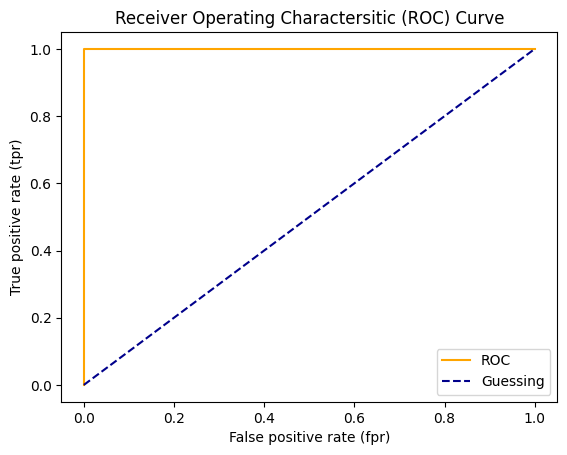

In [109]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC  curve given the false positive rate (fpr) 
    and true positive rate (tpr) of model.
    """
    # Plot roc curve
    plt.plot(fpr,tpr, color="orange", label = "ROC")

    # Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color ="darkblue", linestyle="--", label="Guessing")

    #Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Charactersitic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [110]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

1.0

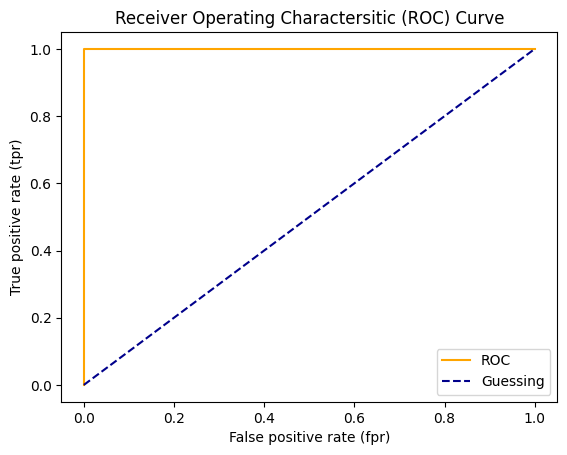

In [111]:
# Plot perfect ROC curve and AUC score (in reality impossible)
fpr, tpr, theresolds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [112]:
roc_auc_score(y_test,y_test)

1.0

### Confusion Matix****

A confusion matix is a quick way to compare the labels a model predict and the actual labels it was supposed to predict.

In essence, giving you an idea where the  model is getting confused. (28)

In [113]:
from sklearn.metrics import confusion_matrix
y_prads = clf.predict(X_test)

confusion_matrix(y_test, y_prads)

array([[29,  0],
       [ 0, 32]])

In [114]:
# Visulaize confusion matix with pd.crosstab()

pd.crosstab(
    y_test,
    y_prads,
    rownames=["Actual Labels"],
    colnames=["Predicted Labels"]
)

Predicted Labels,0,1
Actual Labels,,
0,29,0
1,0,32


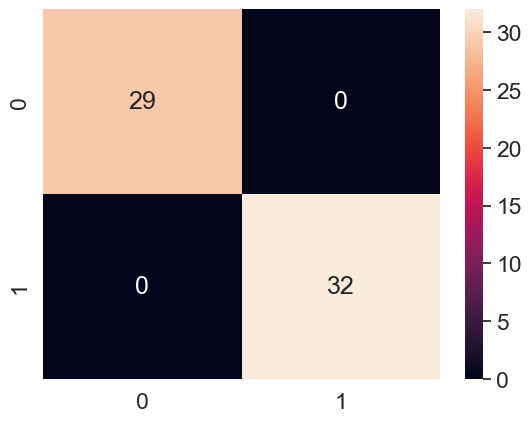

In [115]:
# Make our confusion matix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matix
conf_mat= confusion_matrix(y_test,y_prads)

#plot it using Seaborn
sns.heatmap(conf_mat,annot=True);

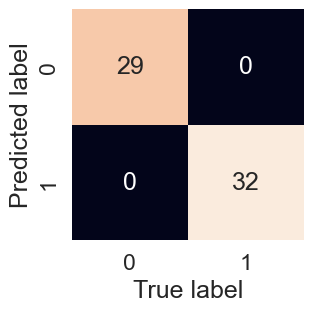

In [116]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matix using Seaborn's heatmap().
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,annot=True, cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label");

plot_conf_mat(conf_mat)

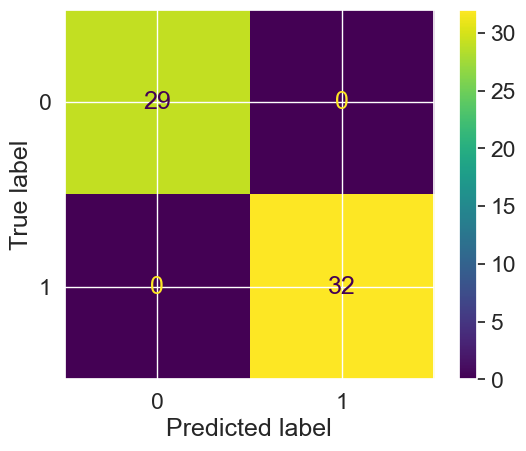

In [117]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=clf.classes_).plot()
plt.show()

### Classification Report (30)

In [118]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_prads))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        32

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



In [119]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case array([1., 0., 0., ..., 0., 0., 0.], shape=(10000,))

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,disease_preds, output_dict=True)) # Macro avg is indicating that the model is not balanced

F:\Practice\ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
F:\Practice\ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
F:\Practice\ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


#### To Summarize classification metics:

    1. Accuracy is a good measure to start with if all class are balanced (e.g. same amount of sample which are labelled with 0 or 1)
    2. Precision and recall become  more importan when class are imbalanced
    3. If false prositive predictions are worse than false negatives, aim for higher precision.
    4. If false negative predictions are worse than false positives, aim for higher recall.
    5. F1-score is a combination of precision and recall

### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (pronounced r-squared) or coefficient of determination.
2. Mean absolute error (MAE)
3. Mean squared error (MSE)


**R^2**

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if alll your model does is predict the mean of the targets, it's R^2 value would be 0. and if  your model perfectly predicts a range of numbers it's R^2 value would be 1.



In [120]:
boston_df = pd.read_csv("boston.csv")
boston_df.head()


,TOWN,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,target
0,Nahant,2011,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3
1,Swampscott,2021,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8
2,Swampscott,2022,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8
3,Marblehead,2031,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7
4,Marblehead,2032,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7


In [121]:
# variables-> transform (OneHotCodeEncoder & Simpleimputer) with pipeline-> Column transform with Preprocessor -> modeling with pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X= boston_df.drop("target",axis=1)
y=boston_df["target"]
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Features = ["TOWN"]
Transform = Pipeline([("OneHot",OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer([("Transformer", Transform, Features )])
model = Pipeline([("Preprecess",Transform),("Forest", RandomForestRegressor(random_state=42))])

model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8640921504257285

In [122]:
y_test.shape

(102,)

In [123]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(shape = len(y_test), fill_value= y_test.mean())
y_test_mean

array([18.5754902, 18.5754902, 18.5754902, 18.5754902, 18.5754902,
       18.5754902, 18.5754902, 18.5754902, 18.5754902, 18.5754902,
       18.5754902, 18.5754902, 18.5754902, 18.5754902, 18.5754902,
       18.5754902, 18.5754902, 18.5754902, 18.5754902, 18.5754902,
       18.5754902, 18.5754902, 18.5754902, 18.5754902, 18.5754902,
       18.5754902, 18.5754902, 18.5754902, 18.5754902, 18.5754902,
       18.5754902, 18.5754902, 18.5754902, 18.5754902, 18.5754902,
       18.5754902, 18.5754902, 18.5754902, 18.5754902, 18.5754902,
       18.5754902, 18.5754902, 18.5754902, 18.5754902, 18.5754902,
       18.5754902, 18.5754902, 18.5754902, 18.5754902, 18.5754902,
       18.5754902, 18.5754902, 18.5754902, 18.5754902, 18.5754902,
       18.5754902, 18.5754902, 18.5754902, 18.5754902, 18.5754902,
       18.5754902, 18.5754902, 18.5754902, 18.5754902, 18.5754902,
       18.5754902, 18.5754902, 18.5754902, 18.5754902, 18.5754902,
       18.5754902, 18.5754902, 18.5754902, 18.5754902, 18.5754

In [124]:
r2_score(y_test, y_test_mean), r2_score(y_test,y_test)

(0.0, 1.0)

## ** Mean absolute error **

MAE is the average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your models predictions are.

In [125]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test,y_preds)
mae

0.28243137254903394

In [126]:
df = pd.DataFrame(
    data={
    "Actual values": y_test, 
    "Predicted Value":y_preds 
        })
df["difference"]=df["Predicted Value"]-df["Actual values"]
df    

,Actual values,Predicted Value,difference
210,18.6,18.606,6.000000e-03
58,19.7,19.658,-4.200000e-02
143,14.7,14.700,2.842171e-14
166,14.7,14.700,2.842171e-14
218,16.4,17.124,7.240000e-01
...,...,...,...
393,20.2,20.200,3.552714e-14
244,19.1,19.100,-3.552714e-14
268,13.0,13.166,1.660000e-01
286,18.2,15.923,-2.277000e+00


## Mean Squared Error (MSE)




In [127]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
mse

0.6372595490196092

In [128]:
# Calculate MSE by Hand
Squared = np.square(df["difference"])
Squared.mean()

np.float64(0.6372595490196092)

### 4.23 Finally using the scoring parameter (35)

In [129]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [130]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = heart_disease.drop("target",axis=1)
y=heart_disease["target"]
clf = RandomForestClassifier()


In [131]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,y,cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [132]:
# Cross-validated accuracy
print(f'The cross-validated accuracy is : {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is : 82.48%


In [133]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f'The cross-validated accuracy is : {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is : 82.48%


In [134]:
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y,cv=5, scoring="precision")
np.mean(cv_precision)

np.float64(0.8329547346025924)

In [135]:
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y,cv=5, scoring="recall")
np.mean(cv_recall)

np.float64(0.8545454545454545)

In [136]:
np.random.seed(42)
cv_f1 = cross_val_score(clf, X, y,cv=5, scoring="f1")
np.mean(cv_f1)

np.float64(0.8426854603423344)

##### How about our regression model?

In [137]:
boston_df.head()

,TOWN,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,target
0,Nahant,2011,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3
1,Swampscott,2021,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8
2,Swampscott,2022,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8
3,Marblehead,2031,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7
4,Marblehead,2032,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7


In [138]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X= boston_df.drop("target",axis=1)
y=boston_df["target"]
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Features = ["TOWN"]
Transform = Pipeline([("OneHot",OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer([("Transformer", Transform, Features )])

model=Pipeline([
    ("preprocess",preprocessor),
    ("forest",RandomForestRegressor(random_state=42))
])



In [139]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X,y,cv=5, scoring=None)
cv_r2

array([ -0.70325831,  -1.24842105,  -3.31825149,  -0.29050404,
       -32.84314516])

In [140]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X,y,cv=5, scoring="r2")
cv_r2

array([ -0.70325831,  -1.24842105,  -3.31825149,  -0.29050404,
       -32.84314516])

In [141]:
np.mean(cv_r2)

np.float64(-7.680716009762975)

In [142]:
cv_mae = cross_val_score(model, X, y, scoring="neg_mean_absolute_error")
cv_mae

array([-1.82407843, -3.32868317, -3.45544554, -1.19528713, -1.88613861])

In [143]:
cv_mse = cross_val_score(model, X, y, cv=5,scoring="neg_mean_squared_error")
cv_mse

array([ -4.9315451 , -15.53054357, -15.53841584,  -1.89687521,
        -3.70247525])

### 4.3 Using different evaluation metric as scikit-Learn functions



##### Classification Evaluation functions

In [144]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

print('Classifier metrics on the test set')
print(f'Accuracy : {accuracy_score(y_test,y_prads)*100:.2f}%') 
print(f'Precision : {precision_score(y_test,y_prads)*100:.2f}%')
print(f'Recall : {recall_score(y_test,y_prads)*100:.2f}%')
print(f'F1 : {f1_score(y_test,y_prads)*100:.2f}%')

Classifier metrics on the test set
Accuracy : 50.82%
Precision : 53.12%
Recall : 53.12%
F1 : 53.12%


#### Regression evaluation functions

In [145]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X= boston_df.drop("target",axis=1)
y=boston_df["target"]
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Features = ["TOWN"]
Transform = Pipeline([("OneHot",OneHotEncoder(handle_unknown='ignore'))])
transform_X = ColumnTransformer([("Transformer", Transform, Features )],remainder="passthrough")

model=Pipeline([
    ("preprocess",transform_X),
    ("forest",RandomForestRegressor(random_state=42))
])
model.fit(X_train,y_train)

,steps,"[('preprocess', ...), ('forest', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Transformer', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [146]:
y_preds = model.predict(X_test)

# Evaluate the regression model
print('Regression model metrics on the test set')
print(f'R^2 : {r2_score(y_test,y_preds)}')
print(f'MAE : {mean_absolute_error(y_test,y_preds)}')
print(f'MSE : {mean_squared_error(y_test,y_preds)}')


Regression model metrics on the test set
R^2 : 0.9334328606606305
MAE : 0.24217647058824554
MSE : 0.31847686274509623


## 5. Improving a model (37)

First predictins = baseline predictions.
First model = baseline model

From  a data perspective:

* Could we collect more data? (generally the more data, the betteer)
* Could we imporove our data? (More depth of info like features)

From a model perspective:

* Is there any better model we could use?
* Could we improve the current model? (hyper-parameters)

Hyperparameters vs Parameters
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV
  

In [147]:
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets, training, validation and test

In [148]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We are going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [149]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {
        "accuracy":round(accuracy,2),
        "precision":round(precision,2),
        "recall":round(recall,2),
        "f1":round(f1,2)
    }

    print(f'Acc: {accuracy*100:.2f}%')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')

    return metric_dict

In [150]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##### We need train set for training, validation for tuning hyperparameter, test set for evaluating (38)

In [151]:

from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Shuffle the data
heart_disease_shuffled= heart_disease.sample(frac=1)

# Split inot X & y
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split+0.15* len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]
len(X_train), len(X_valid),len(X_test)

# Make Baseline model
clf=RandomForestClassifier()
clf.fit(X_train,y_train) # we trained with train set

# Make Baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 Score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [152]:
np.random.seed(42)

# Create a second classifirer with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train,y_train)

# Make prediction
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid,y_preds_2)

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1 Score: 0.84


### 5.2 Hyperparameter tuning with RandomizedSearchCV



In [153]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

grid = {"n_estimators":[10,100,200,500,1000,1200],
        "max_depth": [None, 5, 10,20,30],
        "max_features": [None,"sqrt"],
        "min_samples_split":[2,4,6],
        "min_samples_leaf": [1,2,4]}
np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, # number of models to try
                            cv =5,
                            verbose=2)
# Fit the RandomizedSearchCV version of clf

rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=100

,estimator,RandomForestC...fier(n_jobs=1)
,param_distributions,"{'max_depth': [None, 5, ...], 'max_features': [None, 'sqrt'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 4, ...], ...}"
,n_iter,10
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [154]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [155]:
# Make predictions with the best hyperparameters (39)
rs_y_preds =rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test,rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 Score: 0.81


### 5.3 Hyperparameter tuning with GridSearchCV

In [156]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': [None, 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [157]:
grid_2= {'n_estimators': [100, 200, 500],
         'max_depth': [None],
         'max_features': [None, 'sqrt'],
         'min_samples_split': [ 6],
         'min_samples_leaf': [1, 2]
        }

In [158]:
from sklearn.model_selection import GridSearchCV, train_test_split
np.random.seed(42)

#Split into X & y
X=heart_disease_shuffled.drop("target",axis = 1)
y=heart_disease_shuffled["target"]
#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs =1)
# Setup GridSearch CV
gs_clf = GridSearchCV(estimator=clf,
                     param_grid=grid_2,
                     cv=5,
                     verbose=2)
#Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, 

In [159]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [160]:
gs_y_preds =gs_clf.predict(X_test)
gs_metrics = evaluate_preds(y_test,gs_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 Score: 0.78


Let's compare our different models metrics

<Axes: >

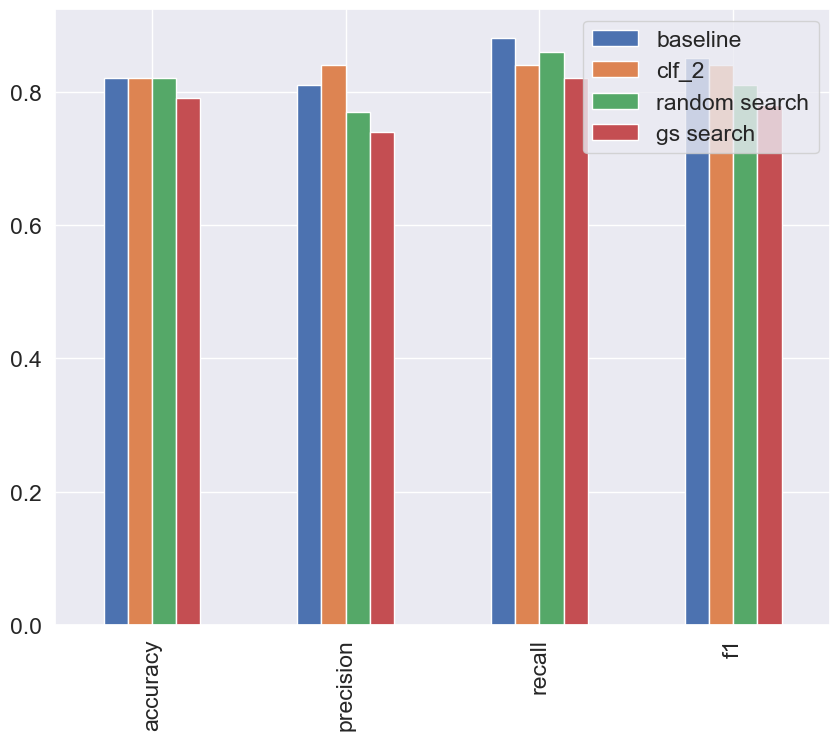

In [161]:
compare_metrics = pd.DataFrame({
        "baseline": baseline_metrics,
        "clf_2": clf_2_metrics,
        "random search": rs_metrics,
        "gs search": gs_metrics
})
compare_metrics.plot.bar(figsize=(10,8))

### Correlation Analysis (41)

# 6 Saving and loading trained machine learning models (42

Two ways to save and load machine learning model:
1. With Python `pickle` module
2. With the `joblib` module

**Pickle**


In [162]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl","wb"))

In [163]:
# Load a saved model
loaded_pickle_model= pickle.load(open("gs_random_forest_model_1.pkl","rb"))

In [164]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test,pickle_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 Score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

**Joblib**

In [173]:
from joblib import dump, load

In [175]:

#Save model to file
dump(gs_clf,filename="gs_random_forest_model1.joblib")

['gs_random_forest_model1.joblib']

In [176]:
# Import a saved joblib model
loaded_joblib_model =  load("gs_random_forest_model1.joblib")

In [177]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test,joblib_y_preds)



Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 Score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

## 7. Putting it all together! (44)


In [182]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [183]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [184]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

***Steps we want to do (all in one cell):***
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [198]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#Modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data=pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorial_feature = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])
numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
prepocessor = ColumnTransformer(transformers=[
        ("cat", categorical_transformer,categorial_feature),
        ("door",door_transformer,door_feature),
        ("num",numeric_transformer,numeric_features)
    ])

# Creating a preprocessing and modeling pipeline
model = Pipeline (steps=[
    ("preprocessor", prepocessor),
    ("model", RandomForestRegressor())
])

#Split data
X = data.drop("Price", axis =1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It's also prossible to use  `GridSearchCV` or `RandomizedSearchCV` with our pipeline


In [201]:
# Use GridSearchCV with our regression pipeline
pipe_grid =  {
    "preprocessor__num__imputer__strategy":["mean","median"],
    "model__n_estimators":[100,1000],
    "model__max_depth":[None, 5],
    "model__max_features":[None],
    "model__min_samples_split":[2,4]
}
gs_model =GridSearchCV(model, pipe_grid,cv=5, verbose=2)
gs_model.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=None, model__min_sampl

,estimator,Pipeline(step...Regressor())])
,param_grid,"{'model__max_depth': [None, 5], 'model__max_features': [None], 'model__min_samples_split': [2, 4], 'model__n_estimators': [100, 1000], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('cat', ...), ('door', ...), ...]"


In [202]:
gs_model.score(X_test,y_test)

0.3339554263158365